In [92]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, roc_curve
from sklearn.model_selection import train_test_split

In [93]:
df = pd.read_csv("lending%20club_scailing%20(2).csv")
df.drop(['funded_amount', 'interest_rate', 'installment', 'total_pymnt', 'term1','total_rec_prncp'], axis=1, inplace=True)
ddf = pd.read_csv("lending%20club_undummies_outlier%20(2).csv")
df2 = ddf[['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp']]
df = pd.concat([df,df2],axis=1)
df
#df.columns.values.tolist()

,loan_amount,annual_income,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,fico_score,funded_amount,interest_rate,installment,total_pymnt,term1,total_rec_prncp
0,0.282051,0.001437,0.204163,0.000000,0.125,0.049383,0.000000,0.002215,0.045388,0.105263,...,0.0,0.111111,0.0,0.161725,12000.0,0.0789,375.43,9735.810000,1.0,5646.56
1,0.333333,0.000705,0.348279,0.034483,0.000,0.098765,0.000000,0.004016,0.074414,0.093567,...,0.6,0.666667,0.4,0.053908,14000.0,0.1147,461.47,16376.889160,1.0,14000.00
2,0.589744,0.001426,0.234788,0.068966,0.000,0.061728,0.000000,0.007416,0.053121,0.046784,...,0.0,0.222222,0.0,0.000000,24000.0,0.1147,791.09,28435.239310,1.0,24000.00
3,0.333333,0.001836,0.146317,0.000000,0.125,0.185185,0.000000,0.006424,0.044940,0.116959,...,0.0,0.111111,0.0,0.000000,14000.0,0.0949,448.40,16034.225380,1.0,14000.00
4,0.333333,0.001230,0.486789,0.000000,0.250,0.197531,0.000000,0.010126,0.059845,0.163743,...,0.0,0.111111,0.0,0.134771,14000.0,0.0999,451.68,14954.260000,1.0,14000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767951,0.794872,0.001426,0.548239,0.000000,0.000,0.160494,0.000000,0.035611,0.091113,0.087719,...,0.0,0.000000,0.0,0.404313,32000.0,0.1875,825.71,40999.670000,0.0,32000.00
767952,0.589744,0.001197,0.684548,0.000000,0.000,0.185185,0.000000,0.014972,0.094587,0.128655,...,0.0,0.000000,0.0,0.134771,24000.0,0.0692,740.18,26627.742300,1.0,24000.00
767953,0.076923,0.000360,0.506205,0.000000,0.250,0.172840,0.000000,0.001327,0.010310,0.140351,...,0.0,0.111111,0.0,0.700809,4000.0,0.0662,122.82,4361.030000,1.0,4000.00
767954,0.179487,0.000820,0.361689,0.068966,0.125,0.111111,0.029412,0.001290,0.041466,0.128655,...,0.3,0.111111,0.4,0.107817,8000.0,0.1288,269.09,8942.840225,1.0,8000.00


In [94]:
x = df.drop(['depvar'],axis=1)
y = df['depvar']

X_train1, X_test1, y_train, y_test = train_test_split(x,y,test_size = 0.4,random_state=45)
X_val1, X_test1, y_val, y_test = train_test_split(X_test1,y_test, test_size=0.5,random_state=45)

#뒤에 1 있는 변수들 : 목적함수 사용에 필요하지만, 모델 돌리는 데는 필요 없는 변수를 포함한 변수
X_train = X_train1.drop(['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp'], axis=1)
X_test  = X_test1.drop(['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp'], axis=1)
X_val   = X_val1.drop(['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp'], axis=1)

# GridSearch
## 시간이 오래 걸리니 돌리지 말고 다음으로 넘어가세요.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest 모델 객체 생성
rf = RandomForestClassifier()

# Grid Search에 사용할 하이퍼파라미터 값들을 딕셔너리 형태로 정의
param_grid = {
    'n_estimators': [80,90, 100],
    'max_depth': [None, 3]
}

# Grid Search 객체 생성
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 정확도 출력
print('Best Parameters:', grid_search.best_params_)
print('Best CV Accuracy:', grid_search.best_score_)

In [102]:
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': None, 'n_estimators': 80}",0.869302,6,0.869330,0.869281,0.869262
1,"{'max_depth': None, 'n_estimators': 90}",0.869319,5,0.869346,0.869281,0.869344
2,"{'max_depth': None, 'n_estimators': 100}",0.869325,1,0.869330,0.869313,0.869376
3,"{'max_depth': 3, 'n_estimators': 80}",0.869325,1,0.869330,0.869313,0.869327
4,"{'max_depth': 3, 'n_estimators': 90}",0.869325,1,0.869330,0.869313,0.869327
5,"{'max_depth': 3, 'n_estimators': 100}",0.869325,1,0.869330,0.869313,0.869327


# 최적의 파라미터를 이용해 모델 생성

In [95]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=3)
#(max_depth= None, max_features= 'sqrt', min_samples_split=4, n_estimators= 80)
#    max_depth = None, max_features = 'sqrt', min_samples_split= 8, n_estimators= 90, min_samples_leaf = 1)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

In [96]:
#1의 개수를 세어보기
count0=0
count1=0
for i in y_pred:
    if i == 1:
        count1+=1
    else:
        count0+=1
print(count0,count1)

153589 3


In [97]:
#1의 개수를 세어보기
count0=0
count1=0
for i in y_test:
    if i == 1:
        count1+=1
    else:
        count0+=1
print(count0,count1)

132877 20715


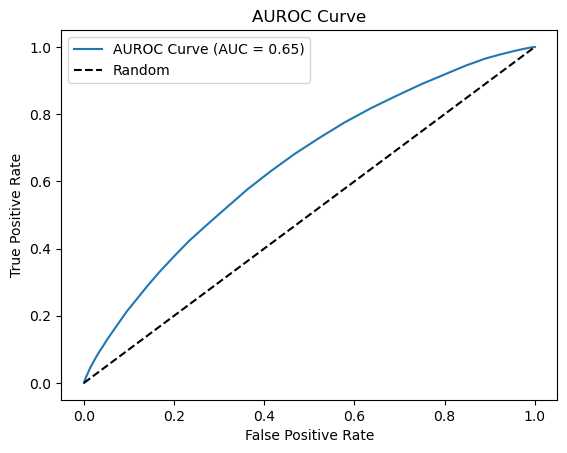

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob_test1=model.predict_proba(X_test)[:,1]
# roc_curve 함수를 사용하여 FPR, TPR 값을 계산합니다.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test1)

# roc_auc_score 함수를 사용하여 AUROC 값을 계산합니다.
roc_auc = roc_auc_score(y_test, y_pred_prob_test1)

# AUROC 곡선을 그립니다.
plt.plot(fpr, tpr, label=f'AUROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

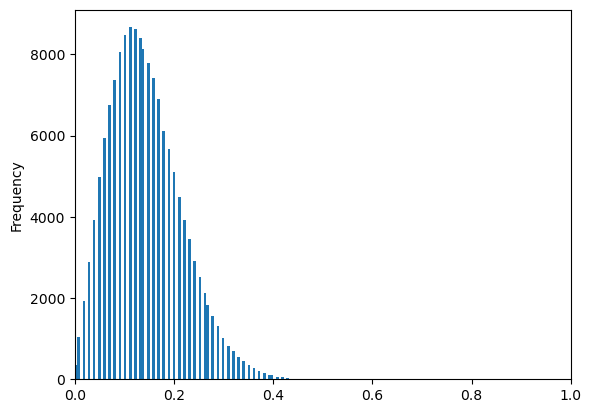

In [99]:
# # 예측값 생성(Validation Set), histogram(frequency)
result = pd.DataFrame(model.predict_proba(X_val)[:,1], columns=['pred_prob'])
result.pred_prob.plot(kind='hist',bins=100, xlim=([0,1]))

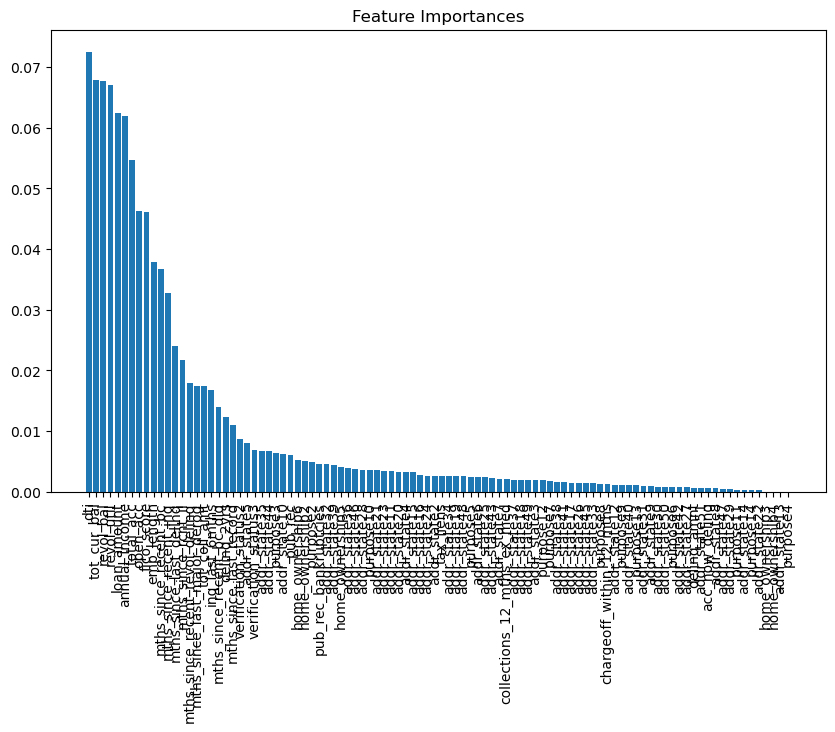

In [100]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# 히스토그램 그리기
plt.figure(figsize=(10,6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.title('Feature Importances')
plt.show()

# Validation Set을 이용해 optimal threshold 잡기

In [101]:
def risk(c1, c2, n, cut_off):
    result = pd.DataFrame(model.predict_proba(X_val)[:,1], columns=['pred_prob'])# y=1일 확률만을 이용하여 사용해야 함.

    for i in range(len(result)):
        if result.loc[i,'pred_prob']>=cut_off:
            result.loc[i,'pred_prob']=1
        else:
            result.loc[i,'pred_prob']=0
    y_pred_prob=result['pred_prob']
    
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred_prob).ravel()  # Calculate confusion matrix
    return c1*fn + c2*fp  # Calculate risk value using given formula

c1 = 0.83
c2 = 0.17
n=153591

x = np.linspace(0, 1, num=11)  # 0.001 ~ 0.12 범위에서 num개의 값 생성
previous_risk = risk(c1,c2, n,0)
for num in x:
    num = round(num, 2)
    risk_value = risk(c1,c2, n, num)
    if previous_risk > risk_value:
        cutoff1 = num
        previous_risk = risk_value
    print(num, risk_value)
print(cutoff1)

0.0 22583.99
0.1 18135.550000000003
0.2 15363.259999999998
0.3 16574.199999999997
0.4 17151.01
0.5 17217.03
0.6 17217.52
0.7 17217.52
0.8 17217.52
0.9 17217.52
1.0 17217.52
0.2


In [102]:
x = np.linspace(cutoff1-0.1, cutoff1+0.1, num=21) 
#x = np.linspace(0,0.1, num=11)

previous_risk = risk(c1,c2, n,0)
for num in x:
    num = round(num, 2)
    risk_value = risk(c1,c2, n, num)
    if previous_risk >= risk_value:
        cutoff = num
        previous_risk = risk_value
    print(num, risk_value)
print('cutoff:',cutoff)
print('risk:', risk(c1,c2, n, cutoff))

0.1 18135.550000000003
0.11 17548.420000000002
0.12 16997.690000000002
0.13 16499.760000000002
0.14 16089.23
0.15 15818.77
0.16 15608.45
0.17 15456.71
0.18 15368.71
0.19 15287.67
0.2 15363.259999999998
0.21 15407.43
0.22 15495.94
0.23 15653.67
0.24 15744.81
0.25 15899.619999999999
0.26 16070.05
0.27 16202.46
0.28 16343.23
0.29 16451.559999999998
0.3 16574.199999999997
cutoff: 0.19
risk: 15287.67


# optimal threshold를 이용해 만든 모델을 test set으로 분석하기

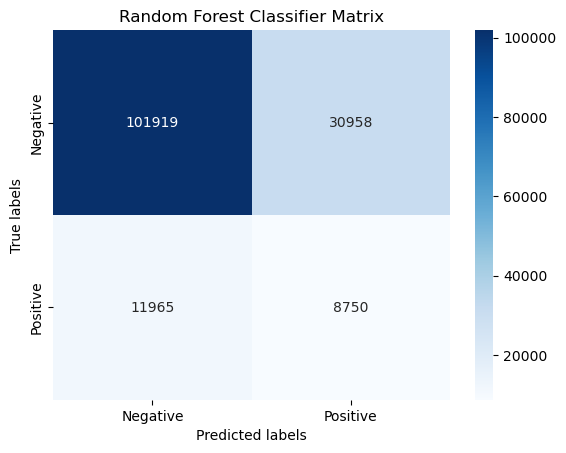

In [103]:
y_test_pred=model.predict(X_test)
result_test= pd.DataFrame(model.predict_proba(X_test)[:,1], columns=['pred_prob'])

result_test.pred_prob.plot(kind='hist',bins=100, xlim=([-1,1]))

def pred_prob(result,cut_off):
    for i in range(len(result)):
        if result.loc[i,'pred_prob']>=cut_off:
            result.loc[i,'pred_prob']=1
        else:
            result.loc[i,'pred_prob']=0

pred_prob(result_test, cutoff)
y_pred_prob_test=result_test['pred_prob']

import matplotlib.pyplot as plt
import seaborn as sns

# y_test: 정답 레이블, y_pred_prob_test: 예측 결과 확률값
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_prob_test.round()).ravel()

# 혼동 행렬 시각화
labels = ['Negative', 'Positive']
cm = [[tn_test, fp_test], [fn_test, tp_test]]

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Random Forest Classifier Matrix')
plt.show()

In [104]:
precision = precision_score(y_test, y_pred_prob_test)
print(precision)

recall = recall_score(y_test, y_pred_prob_test)
print(recall)

f1 = f1_score(y_test, y_pred_prob_test)
print(f1)

accuracy = accuracy_score(y_test, y_pred_prob_test)
print(accuracy)

0.22035861791074846
0.42239922761284093
0.2896248117438724
0.7205388301474035


In [105]:
#y_pred_prob_test.value_counts()
#y_pred_prob

In [106]:
def predict(cut_off): #threshold에 따른 predict dataframe 만들기
    result = pd.DataFrame(model.predict_proba(X_val)[:,1], columns=['depvar_pred'])
    for i in range(len(result)):
        if result.loc[i,'depvar_pred']>=cut_off:
            result.loc[i,'depvar_pred']=1
        else:
            result.loc[i,'depvar_pred']=0
    return result['depvar_pred']

def loss(n,threshold):
    dep_pred = predict(threshold) #threshold 지정했을 때 y_pred값을 저장한 dataframe
    validation = pd.concat([X_val1,y_val],axis=1)
    validation = validation.reset_index() #인덱스 0,1,2, ... 순으로 재정리하기. 다음 함수 실행할 때 필요함.
    validation = pd.concat([validation,dep_pred],axis=1)
    validation #원래의 X_validation 데이터프레임에 y_pred 값 이어붙이기

    w1=0; w2=0
    for idx in range(n):
        #부도를 내지 않을 것으로 예측했지만 부도를 낸 경우 손실 계산
        if validation['depvar'][idx] == 1 and validation['depvar_pred'][idx] == 0:
            installment_ = validation['installment'][idx]
            if validation['term1'][idx] == 1:
                term = 36
            else:
                term = 60
            total_pymnt_ = validation['total_pymnt'][idx]
            num = installment_*term - total_pymnt_ #월별상환액*기간 - 부도직전상환액
            w1 += num
        
        #부도를 낼 것으로 예측했지만 부도를 내지 않은 경우 손실 계산
        elif validation['depvar'][idx] == 0 and validation['depvar_pred'][idx] == 1:
            funded_amnt_ = validation['funded_amount'][idx]
            int_rate_ = validation['interest_rate'][idx]
            w2 += funded_amnt_*int_rate_ #이자금 (=총금액*이자율)
    
    loss = w1 + w2
    return loss


def income(n,threshold):
    dep_pred = predict(threshold) #threshold 지정했을 때 y_pred값을 저장한 dataframe
    validation = pd.concat([X_val1,y_val],axis=1)
    validation = validation.reset_index() #인덱스 0,1,2, ... 순으로 재정리하기. 다음 함수 실행할 때 필요함.
    validation = pd.concat([validation,dep_pred],axis=1)
    validation #원래의 X_validation 데이터프레임에 y_pred 값 이어붙이기
    
    profit_1 = 0
    loss_1 = 0
    for idx in range(n):
        if validation['depvar'][idx] == 0 and validation['depvar_pred'][idx] == 0:
            funded_amnt_ = validation['funded_amount'][idx]
            int_rate_ = validation['interest_rate'][idx]
            profit_1 += funded_amnt_*int_rate_ #이자금 (=총금액*이자율)
        elif validation['depvar'][idx] == 1 and validation['depvar_pred'][idx] == 0:
            funded_amnt_ = validation['funded_amount'][idx]
            total_rec_ = validation['total_rec_prncp'][idx]
            loss_1 += funded_amnt_ - total_rec_ #대출금 - 월별상환액
        
    return profit_1-loss_1

In [107]:
n = 153591
print(loss(n,cutoff))
print(loss(n,cutoff)/n)
print(income(n,cutoff))
print(income(n,cutoff)/n)

162195358.38408393
1056.0212407242868
45908243.76750356
298.8993089927376


In [108]:
def predict_1(cut_off): #threshold에 따른 predict dataframe 만들기
    result1 = pd.DataFrame(model.predict_proba(X_test)[:,1], columns=['depvar_pred'])
    
    #예측 확률이 cutoff이상인 경우, 예측을 1로, cutoff 미만인 경우 0으로 둔다.
    for i in range(len(result1)):
        if result1.loc[i,'depvar_pred']>=cut_off:
            result1.loc[i,'depvar_pred']=1
        else:
            result1.loc[i,'depvar_pred']=0
    return result1['depvar_pred']


def loss_1(n,threshold):
    #threshold 지정했을 때 y_pred값을 저장한 dataframe에 필요한 사후변수를 추가하는 과정
    dep_pred = predict_1(threshold) #threshold 지정했을 때 y_pred값을 저장한 dataframe
    test = pd.concat([X_test1,y_test],axis=1)
    test = test.reset_index()
    test = pd.concat([test,dep_pred],axis=1)

    w1=0; w2=0
    for idx in range(n):
        #부도를 내지 않을 것으로 예측했지만 부도를 낸 경우 손실 계산
        if test['depvar'][idx] == 1 and test['depvar_pred'][idx] == 0:
            installment_ = test['installment'][idx]
            if test['term1'][idx] == 1:
                term = 36
            else:
                term = 60
            total_pymnt_ = test['total_pymnt'][idx]
            num = installment_*term - total_pymnt_ #월별상환액*기간 - 부도직전상환액
            w1 += num
        
        #부도를 낼 것으로 예측했지만 부도를 내지 않은 경우 손실 계산
        elif test['depvar'][idx] == 0 and test['depvar_pred'][idx] == 1:
            funded_amnt_ = test['funded_amount'][idx]
            int_rate_ = test['interest_rate'][idx]
            w2 += funded_amnt_*int_rate_ #이자금 (=총금액*이자율)
    
    loss_1 = w1 + w2
    return loss_1



def income_1(n,threshold):
    #threshold 지정했을 때 y_pred값을 저장한 dataframe에 필요한 사후변수를 추가하는 과정
    dep_pred = predict_1(threshold) #threshold 지정했을 때 y_pred값을 저장한 dataframe
    test = pd.concat([X_test1,y_test],axis=1)
    test = test.reset_index() 
    test = pd.concat([test,dep_pred],axis=1)
    
    profit = 0; loss = 0
    for idx in range(n):
        if test['depvar'][idx] == 0 and test['depvar_pred'][idx] == 0:
            funded_amnt_ = test['funded_amount'][idx]
            int_rate_ = test['interest_rate'][idx]
            profit += funded_amnt_*int_rate_ #이자금 (=총금액*이자율)
        elif test['depvar'][idx] == 1 and test['depvar_pred'][idx] == 0:
            funded_amnt_ = test['funded_amount'][idx]
            total_rec_ = test['total_rec_prncp'][idx]
            loss += funded_amnt_ - total_rec_ #대출금 - 월별상환액
        
    return profit-loss

n = 153591
print(loss_1(n,cutoff))
print(loss_1(n,cutoff)/n)
print(income_1(n,cutoff))
print(income_1(n,cutoff)/n)

158922164.73359105
1034.7101375314378
48132005.71500364
313.37777418601115
